# Download a ViSAPy data file

This is the retina data set generated with (ViSAPy)[https://github.com/espenhgn/ViSAPy] as presented in Espen's (paper)[http://dx.doi.org/10.1016/j.jneumeth.2015.01.029] in the Journal of Neuroscience Methods.

In [58]:
import urllib
file_url = 'https://datasync.ed.ac.uk/public.php/webdav'

password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
password_mgr.add_password(None, file_url, "GbnXJ5bU3m9JPau", "HS2")
handler = urllib.request.HTTPBasicAuthHandler(password_mgr)
opener = urllib.request.build_opener(handler)
opener.open(file_url)
urllib.request.install_opener(opener)
with urllib.request.urlopen(file_url) as response, open('visapy_data.npy', 'wb') as out_file:
    data = response.read()
    out_file.write(data)

# Use of the `HSDetection` class

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('..')
from hs2 import HSDetection
from probe import HierlmannVisapyEmulationProbe
import matplotlib.pyplot as plt


In [2]:
# raw data location
data_path = 'visapy_data.npy'

# detection parameters
to_localize = True
cutout_start = 14
cutout_end = 36
threshold = 12
file_directory = 'results/'
file_name = 'ProcessedSpikes_visapy'

In [3]:
Probe = HierlmannVisapyEmulationProbe(data_path)
H = HSDetection(Probe, to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name, 
                file_directory_name=file_directory, save_all=True)

File size: 122400102
Number of channels: 102


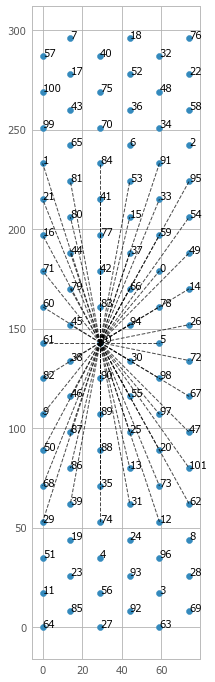

In [4]:
Probe.show()

In [5]:
H.DetectFromRaw()

# Sampling rate: 32000
# Localization On
# Not Masking any Channels
# Writing out extended detection info
# Number of recorded channels: 102
# Analysing frames: 1200001, Seconds:37.50003125
# Frames before spike in cutout: 32
# Frames after spike in cutout: 70
# tcuts: 44 59
# tInc: 50000
# Analysing 50000 frames; from -44 to 50059
# t0:50000 tcut2:59 tInc:50000
# Analysing 50000 frames; from 49956 to 100059
# t0:100000 tcut2:59 tInc:50000
# Analysing 50000 frames; from 99956 to 150059
# t0:150000 tcut2:59 tInc:50000
# Analysing 50000 frames; from 149956 to 200059
# t0:200000 tcut2:59 tInc:50000
# Analysing 50000 frames; from 199956 to 250059
# t0:250000 tcut2:59 tInc:50000
# Analysing 50000 frames; from 249956 to 300059
# t0:300000 tcut2:59 tInc:50000
# Analysing 50000 frames; from 299956 to 350059
# t0:350000 tcut2:59 tInc:50000
# Analysing 50000 frames; from 349956 to 400059
# t0:400000 tcut2:59 tInc:50000
# Analysing 50000 frames; from 399956 to 450059
# t0:450000 tcut2:59 tInc:500

In [6]:
H.LoadDetected()

Detected and read 48009 spikes.


Spike detected at channel:  68
Spike detected at frame:  4611
13.628 65.099


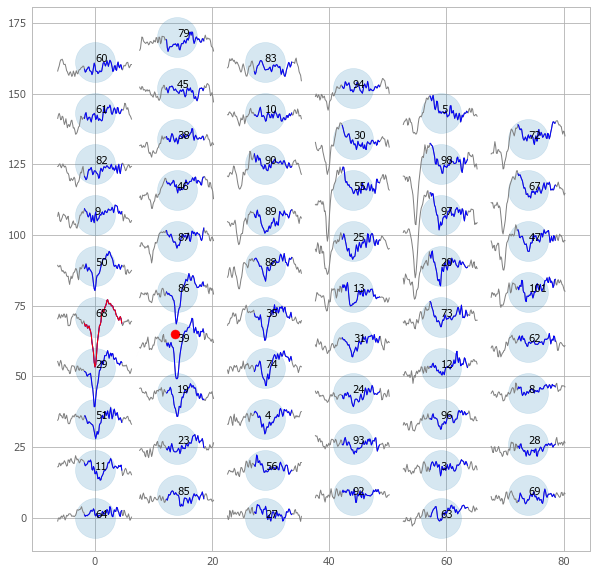

In [7]:
plt.figure(figsize=(10, 10))
H.PlotTracesChannels(200, window_size=100)

(0, 500)

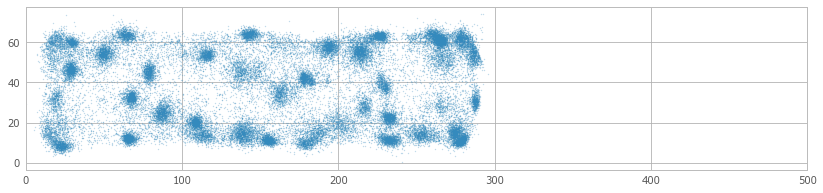

In [8]:
plt.figure(figsize=(14, 3))
ax = plt.subplot(111)
H.PlotAll(invert=True, s=1, alpha=0.2, ax=ax)
ax.set_xlim((0,500))

# Use of the `HSClustering` class

In [9]:
from hs2 import HSClustering

In [10]:
# read
C = HSClustering(H)

In [11]:
%%time
C.ShapePCA(pca_ncomponents=2, pca_whiten=True)

Fitting PCA using 48009 spikes...
CPU times: user 882 ms, sys: 78.6 ms, total: 960 ms
Wall time: 215 ms


array([[-0.59753918, -0.40706639],
       [ 0.69251358, -0.42250185],
       [-0.90861396, -0.7439123 ],
       ...,
       [-0.38069583, -1.13255708],
       [-0.99223785, -0.24398237],
       [-0.06829496,  0.43111256]])

In [12]:
%%time
# note parameters are not particularly optimised (yet)
C.CombinedClustering(alpha=4, bandwidth=5., bin_seeding=False, n_jobs=-1)

Clustering...
Clustering 48009 spikes...
number of seeds: 48009
seeds/job: 4001
using 12 cpus


[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:   36.4s remaining:  1.8min
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:   37.0s remaining:    7.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   37.5s finished


Number of estimated clusters: 471
CPU times: user 1.98 s, sys: 151 ms, total: 2.13 s
Wall time: 38.9 s


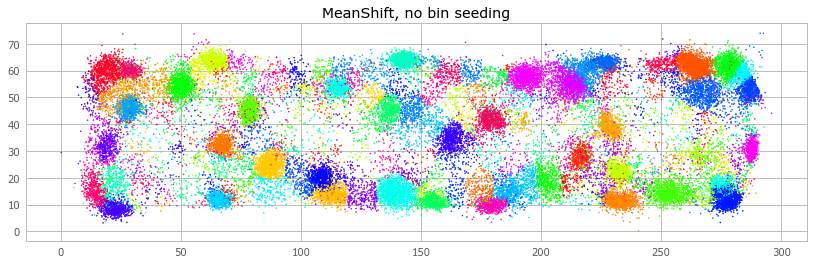

In [13]:
plt.figure(figsize=(14, 4))
ax = plt.subplot(111)
C.PlotAll(invert=True, s=1, ax=ax, max_show=100000,show_labels=False)
plt.title("MeanShift, no bin seeding");

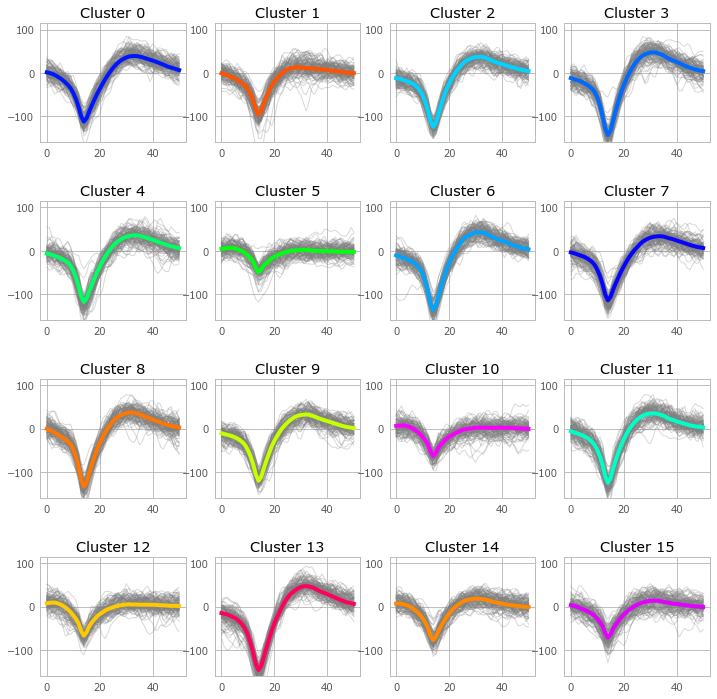

In [14]:
units = range(16)
C.PlotShapes(units)

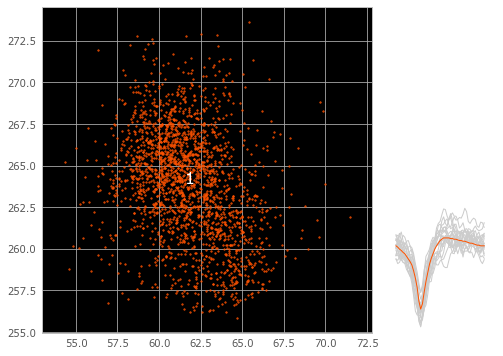

In [15]:
C.PlotNeighbourhood(1,radius=6, alpha=0.8);

In [16]:
C.SaveHDF5(file_name+"_sorted.hdf5")